# Hello Tensors vs. Images

In [11]:
# Prerequisites
import numpy as np
import matplotlib.pyplot as plt

import cv2
from PIL import Image

import torch


### Load an image with OpenCV and PIL and compare

In [12]:
image_path_1 = "images/motorcycle.jpg"
image_path_2 = "images/abu_dhabi_camel.jpg"

# Open with OpenCV
img_cv = cv2.imread(image_path_1)
print("CV Image type: ", type(img_cv))
print("CV Image shape: ", img_cv.shape )
print("CV Image pixel data type: ", img_cv.dtype )

print()
# Open with PIL
img_pil = Image.open(image_path_2)
print("PIL Image type: ", type(img_pil))
print("PIL Image size: ", img_pil.size )
print("PIL Image mode: ", img_pil.mode )
print("PIL Image info: ", img_pil.info )


CV Image type:  <class 'numpy.ndarray'>
CV Image shape:  (852, 1280, 3)
CV Image pixel data type:  uint8

PIL Image type:  <class 'PIL.JpegImagePlugin.JpegImageFile'>
PIL Image size:  (1280, 852)
PIL Image mode:  RGB
PIL Image info:  {'jfif': 257, 'jfif_version': (1, 1), 'dpi': (300, 300), 'jfif_unit': 1, 'jfif_density': (300, 300), 'exif': b'Exif\x00\x00II*\x00\x08\x00\x00\x00\r\x00\x0f\x01\x02\x00\x12\x00\x00\x00\xac\x00\x00\x00\x10\x01\x02\x00\x0b\x00\x00\x00\xc0\x00\x00\x00\x12\x01\x03\x00\x01\x00\x00\x00\x01\x00\x00\x00\x1a\x01\x05\x00\x01\x00\x00\x00\xcc\x00\x00\x00\x1b\x01\x05\x00\x01\x00\x00\x00\xd4\x00\x00\x00(\x01\x03\x00\x01\x00\x00\x00\x02\x00\x00\x001\x01\x02\x00\r\x00\x00\x00\xdc\x00\x00\x002\x01\x02\x00\x14\x00\x00\x00\xec\x00\x00\x00;\x01\x02\x00%\x00\x00\x00\x00\x01\x00\x00\x13\x02\x03\x00\x01\x00\x00\x00\x02\x00\x00\x00\x98\x82\x02\x007\x00\x00\x00(\x01\x00\x00i\x87\x04\x00\x01\x00\x00\x00`\x01\x00\x00%\x88\x04\x00\x01\x00\x00\x00\xd8v\x00\x00\xd4w\x00\x00\x00\x00NIKO

### Visualize CV and PIL Image

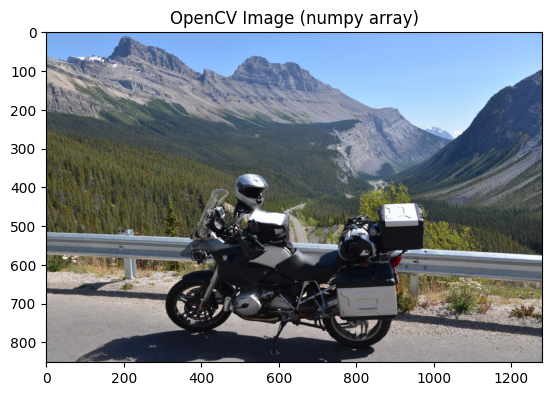

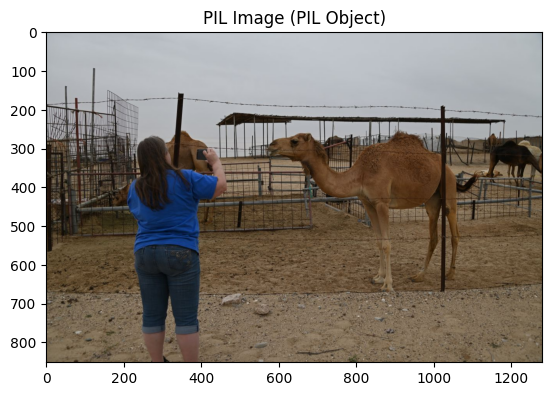

In [ ]:
# Convert CV Image to RGB
img_cv_rgb = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)
plt.figure()
plt.title("OpenCV Image (numpy array)")
plt.imshow(img_cv_rgb)

# Show PIL Image
plt.figure()
plt.title("PIL Image (PIL Object)")
plt.imshow(img_pil)


### Convert between image types

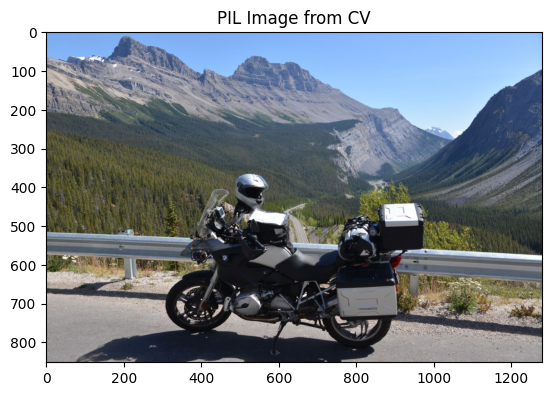

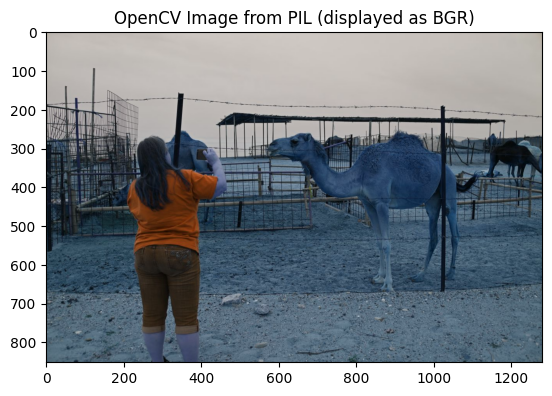

In [15]:
# Convert from CV2 (BGR ndarray) -> PIL (RGB)
img_cv_rgb = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)
img_pil_from_cv = Image.fromarray(img_cv_rgb)  # now a PIL RGB image
# Show PIL Image
plt.figure()
plt.title("PIL Image from CV")
plt.imshow(img_pil_from_cv)

# PIL (RGB) -> cv2 (BGR ndarray)
nd_rgb = np.array(img_pil)                 # (H, W, 3) RGB uint8
img_cv_from_pil = cv2.cvtColor(nd_rgb, cv2.COLOR_RGB2BGR)
plt.figure()
plt.title("OpenCV Image from PIL (displayed as BGR)")
plt.imshow(img_cv_from_pil)

### Convert Between Tensors and Images

In [ ]:
# CV2 (BGR uint8) -> torch Tensor (float RGB, C,H,W, 0..1)
img_cv_rgb = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)    # (H,W,3) uint8
t1 = torch.from_numpy(img_cv_rgb).permute(2,0,1).float() / 255.0   # (3,H,W) float32
print("Tensor t1 from CV image type: ", type(t1))
print("Tensor from CV image shape: ", t1.shape)
print("The size of the first dimension is: ", t1.shape[0])
print("Tensor datatype is: ", t1.dtype)
print("Tensor number of elements: ", t1.numel())
print(f"Tensor min value = {t1.min()}, and max value = {t1.max()}")
print()

# PIL (RGB) -> torch Tensor (float RGB, C,H,W, 0..1)
t2 = torch.from_numpy(np.array(img_pil)).permute(2,0,1).float() / 255.0
print("Tensor t2 from CV image type: ", type(t2))
print("Tensor from CV image shape: ", t2.shape)
print("The size of the first dimension is: ", t2.shape[0])
print("Tensor datatype is: ", t2.dtype)
print("Tensor number of elements: ", t2.numel())
print(f"Tensor min value = {t2.min()}, and max value = {t2.max()}")


Tensor t1 from CV image type:  <class 'torch.Tensor'>
Tensor from CV image shape:  torch.Size([3, 852, 1280])
The size of the first dimension is:  3
Tensor datatype is:  torch.float32
Tensor number of elements:  3271680
Tensor min value = 0.0, and max value = 1.0

Tensor t2 from CV image type:  <class 'torch.Tensor'>
Tensor from CV image shape:  torch.Size([3, 852, 1280])
The size of the first dimension is:  3
Tensor datatype is:  torch.float32
Tensor number of elements:  3271680
Tensor min value = 0.0, and max value = 0.8666666746139526


### Create a uint8 tensor

In [ ]:
# PIL (RGB uint8) -> torch Tensor (uint8 RGB, C,H,W, 0..1)
t3 = torch.from_numpy(np.array(img_pil)).permute(2,0,1).contiguous()  # (3,H,W) uint8
print("Tensor t3 from CV image type: ", type(t3))
print("Tensor from CV image shape: ", t3.shape)
print("The size of the first dimension is: ", t3.shape[0])
print("Tensor datatype is: ", t3.dtype)
print("Tensor number of elements: ", t3.numel())
print(f"Tensor min value = {t3.min()}, and max value = {t3.max()}")

Tensor t3 from CV image type:  <class 'torch.Tensor'>
Tensor from CV image shape:  torch.Size([3, 852, 1280])
The size of the first dimension is:  3
Tensor datatype is:  torch.uint8
Tensor number of elements:  3271680
Tensor min value = 0, and max value = 221


### Convert Tensors back to visualizable datastructures

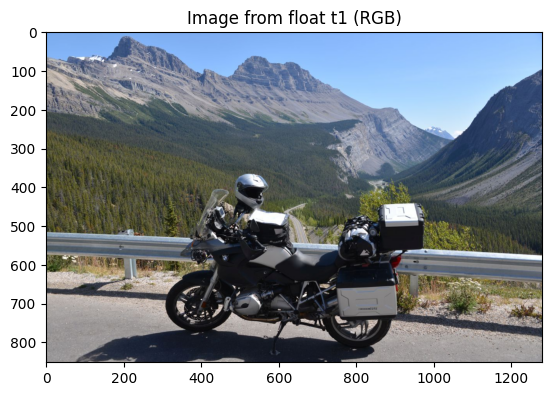

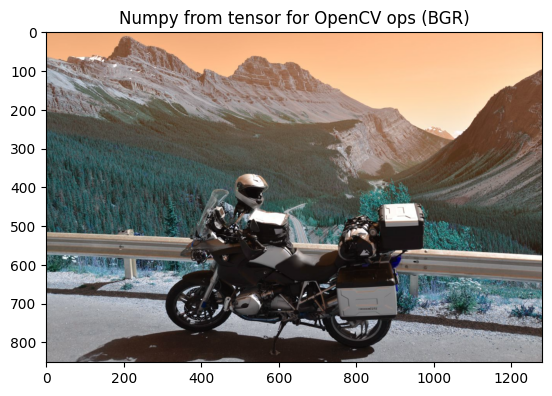

In [23]:
# torch float (C,H,W, 0..1) -> matplotlib
t_clamped = t1.clamp(0,1)
img_for_plot = (t_clamped.permute(1,2,0).cpu().numpy())  # (H,W,3) float 0..1 RGB
plt.figure()
plt.title("Image from float t1 (RGB)")
plt.imshow(img_for_plot)

# torch uint8 (C,H,W) -> cv2 BGR for OpenCV ops
t_u8 = (t_clamped * 255).byte()
rgb_u8 = t_u8.permute(1,2,0).cpu().numpy()               # (H,W,3) uint8 RGB
bgr_u8 = cv2.cvtColor(rgb_u8, cv2.COLOR_RGB2BGR)
plt.figure()
plt.title("Numpy from tensor for OpenCV ops (BGR)")
plt.imshow(bgr_u8)


### CV Grayscale Image

CV Image type:  <class 'numpy.ndarray'>
CV Image shape:  (852, 1280, 3)
CV Image pixel data type:  uint8

Tensor from CV gray image type:  <class 'torch.Tensor'>
Tensor from CV image shape:  torch.Size([1, 852, 1280])
The size of the first dimension is:  1
Tensor datatype is:  torch.float32
Tensor number of elements:  1090560
Tensor min value = 0.0, and max value = 1.0


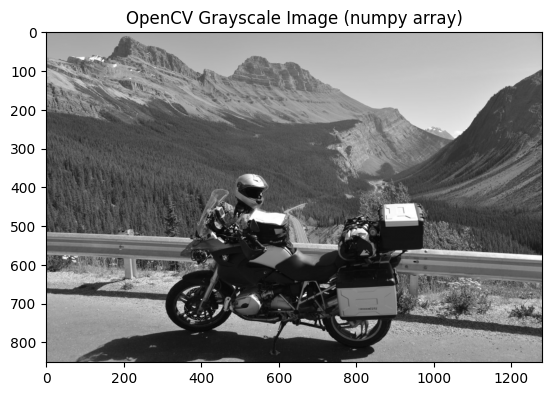

In [ ]:
# cv2 gray -> torch (1,H,W)
img_gray_cv = cv2.imread(image_path_1, cv2.IMREAD_GRAYSCALE)    # (H,W), uint8
print("CV Image type: ", type(img_cv))
print("CV Image shape: ", img_cv.shape )
print("CV Image pixel data type: ", img_cv.dtype )
print()

plt.figure()
plt.title("OpenCV Grayscale Image (numpy array)")
plt.imshow(img_gray_cv, cmap="gray")

# Convert to gray scale tensor
t1_gray = torch.from_numpy(img_gray_cv).unsqueeze(0).float() / 255.0  # (1,H,W)
print("Tensor from CV gray image type: ", type(t1_gray))
print("Tensor from CV image shape: ", t1_gray.shape)
print("The size of the first dimension is: ", t1_gray.shape[0])
print("Tensor datatype is: ", t1_gray.dtype)
print("Tensor number of elements: ", t1_gray.numel())
print(f"Tensor min value = {t1_gray.min()}, and max value = {t1_gray.max()}")

# PIL gray -> torch (1,H,W)
#gray_pil = Image.open(path).convert("L")
#t_gray2 = to_tensor(gray_pil)                       # (1,H,W), float

# torch gray -> PIL -> show
#pil_gray_back = to_pil_image(t_gray2)               # mode "L"
#plt.figure(); plt.title("Grayscale"); plt.imshow(pil_gray_back, cmap="gray"); plt.axis("off")

### PIL Gray Scale Image

PIL Image type:  <class 'PIL.Image.Image'>
PIL Image size:  (1280, 852)
PIL Image mode:  L

Tensor from CV gray image type:  <class 'torch.Tensor'>
Tensor from CV image shape:  torch.Size([1, 852, 1280])
The size of the first dimension is:  1
Tensor datatype is:  torch.float32
Tensor number of elements:  1090560
Tensor min value = 0.0, and max value = 1.0


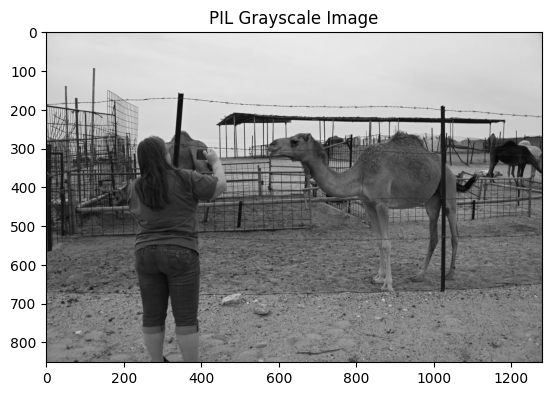

In [ ]:
# PIL gray -> torch (1,H,W)
img_gray_pil = Image.open(image_path_2).convert("L")
print("PIL Image type: ", type(img_gray_pil))
print("PIL Image size: ", img_gray_pil.size)
print("PIL Image mode: ", img_gray_pil.mode)
print()

plt.figure()
plt.title("PIL Grayscale Image")
plt.imshow(img_gray_pil , cmap="gray")

# Convert to gray scale tensor
t1_gray = torch.from_numpy(img_gray_cv).unsqueeze(0).float() / 255.0  # (1,H,W)
print("Tensor from CV gray image type: ", type(t1_gray))
print("Tensor from CV image shape: ", t1_gray.shape)
print("The size of the first dimension is: ", t1_gray.shape[0])
print("Tensor datatype is: ", t1_gray.dtype)
print("Tensor number of elements: ", t1_gray.numel())
print(f"Tensor min value = {t1_gray.min()}, and max value = {t1_gray.max()}")
